# Основы глубинного обучения, майнор ИАД

## Домашнее задание 1: полносвязные сети

**ФИО:** Афонина Полина Александровна

**Факт о себе:** недавно я изучала карту Пензы с ревматологом из Реутова


## Общая информация

__Дата выдачи:__ 22.09.2025

__Мягкий дедлайн:__ 23:59MSK 12.10.2025

__Жесткий дедлайн:__ 23:59MSK 19.10.2025


## Оценивание и штрафы

Максимально допустимая оценка за работу — 10 баллов. Сдавать задание после указанного срока сдачи нельзя.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).  Если два студента сгенерировали в нейронке одинаковые либо похожие решения, это считается плагиатом и приводит к обнулению обеих работ.

Неэффективная реализация кода может негативно отразиться на оценке. Также оценка может быть снижена за плохо читаемый код и плохо оформленные графики. Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.

Итогова оценка считается как

$$
min(part_1, part_2) \cdot 0.6 + max(part_1, part_2) \cdot 0.2 + part_3 \cdot 0.2
$$

где $part_1$, $part_2$ и $part_3$ - оценки за первую, вторую и третью части работы

> Также, за домашнее задание выставляется 0, если не сделано нулевое задание либо нет подробного описания ваших экспериментов в третьей части.

## Оформление

1. Обязательно фиксируйте зерно генератора случайных чисел в экспериментах. При перезапуске кода значения не должны меняться.
2. Вверху файла подпишите фамилию, имя и какой-то занимательный факт о себе.
3. Обратите внимание, что у графиков должны быть подписаны оси, заголовок графика и при необходимости обязательно наличие легенды.

> За отсутствие названий графиков и подписей к осям могут снижаться баллы. Все картинки должны быть самодостаточны и визуально удобны для восприятия, так чтобы не нужно было смотреть ваш код или знать задание, чтобы понять что на них изображено.

Из каждого проведённого эксперимента делайте выводы и фиксируйте их. Эти выводы не должны быть поверхностными и очевидными. Не будьте мудрым королём.

<br>

<center>
<img src="https://raw.githubusercontent.com/hse-ds/iad-deep-learning/refs/heads/master/2025/homeworks/king.png" width="300">
</center>

**Пример плохого вывода:** Синенькая линия идет вверх, а красная вниз. Черненькая идет вниз, а потом вверх.

<br>

<center>
<img src="https://raw.githubusercontent.com/hse-ds/iad-deep-learning/refs/heads/master/2025/homeworks/bad_lines.png" width="600">
</center>

## О задании

Вам предстоит обучить полносвязную нейронную сеть для предсказания года выпуска песни по ее аудио-признакам. Для этого мы будем использовать [Million Songs Dataset](https://samyzaf.com/ML/song_year/song_year.html).

In [1]:
import torch
from torch import nn
import torch.nn.functional as F

import pandas as pd
import numpy as np
import random

from tqdm.notebook import tqdm
from IPython.display import clear_output
import matplotlib.pyplot as plt

device = "cuda" if torch.cuda.is_available() else "cpu"

Начнем с того, что скачаем и загрузим данные:

In [2]:
!wget -O yearpredictionmsd.zip https://archive.ics.uci.edu/static/public/203/yearpredictionmsd.zip

--2025-10-12 16:58:36--  https://archive.ics.uci.edu/static/public/203/yearpredictionmsd.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘yearpredictionmsd.zip’

yearpredictionmsd.z     [           <=>      ] 201.24M   100MB/s    in 2.0s    

2025-10-12 16:58:38 (100 MB/s) - ‘yearpredictionmsd.zip’ saved [211011981]



In [3]:
df = pd.read_csv('yearpredictionmsd.zip', header=None)
df.head()

0         1         2         3         4         5         6         7   \
0  2001  49.94357  21.47114  73.07750   8.74861 -17.40628 -13.09905 -25.01202   
1  2001  48.73215  18.42930  70.32679  12.94636 -10.32437 -24.83777   8.76630   
2  2001  50.95714  31.85602  55.81851  13.41693  -6.57898 -18.54940  -3.27872   
3  2001  48.24750  -1.89837  36.29772   2.58776   0.97170 -26.21683   5.05097   
4  2001  50.97020  42.20998  67.09964   8.46791 -15.85279 -16.81409 -12.48207   

         8         9   ...        81         82        83        84        85  \
0 -12.23257   7.83089  ...  13.01620  -54.40548  58.99367  15.37344   1.11144   
1  -0.92019  18.76548  ...   5.66812  -19.68073  33.04964  42.87836  -9.90378   
2  -2.35035  16.07017  ...   3.03800   26.05866 -50.92779  10.93792  -0.07568   
3 -10.34124   3.55005  ...  34.57337 -171.70734 -16.96705 -46.67617 -12.51516   
4  -9.37636  12.63699  ...   9.92661  -55.95724  64.92712 -17.72522  -1.49237   

         86         87        88         89        90  
0 -23.08793   68.40795  -1.82223  -27.46348   2.26327  
1 -32.22788   70.49388  12.04941   58.43453  26.92061  
2  43.20130 -115.00698  -0.05859   39.67068  -0.66345  
3  82.58061  -72.08993   9.90558  199.62971  18.85382  
4  -7.50035   51.76631   7.88713   55.66926  28.74903  

[5 rows x 91 columns]

Посмотрим на статистики по данным.

In [4]:
df.describe()

0              1              2              3   \
count  515345.000000  515345.000000  515345.000000  515345.000000   
mean     1998.397082      43.387126       1.289554       8.658347   
std        10.931046       6.067558      51.580351      35.268585   
min      1922.000000       1.749000    -337.092500    -301.005060   
25%      1994.000000      39.954690     -26.059520     -11.462710   
50%      2002.000000      44.258500       8.417850      10.476320   
75%      2006.000000      47.833890      36.124010      29.764820   
max      2011.000000      61.970140     384.065730     322.851430   

                  4              5              6              7   \
count  515345.000000  515345.000000  515345.000000  515345.000000   
mean        1.164124      -6.553601      -9.521975      -2.391089   
std        16.322790      22.860785      12.857751      14.571873   
min      -154.183580    -181.953370     -81.794290    -188.214000   
25%        -8.487500     -20.666450     -18.440990     -10.780600   
50%        -0.652840      -6.007770     -11.188390      -2.046670   
75%         8.787540       7.741870      -2.388960       6.508580   
max       335.771820     262.068870     166.236890     172.402680   

                  8              9   ...             81             82  \
count  515345.000000  515345.000000  ...  515345.000000  515345.000000   
mean       -1.793236       3.727876  ...      15.755406     -73.461500   
std         7.963827      10.582861  ...      32.099635     175.618889   
min       -72.503850    -126.479040  ...    -437.722030   -4402.376440   
25%        -6.468420      -2.293660  ...      -1.812650    -139.555160   
50%        -1.736450       3.822310  ...       9.171850     -53.090060   
75%         2.913450       9.961820  ...      26.274480      13.478730   
max       126.741270     146.297950  ...     840.973380    4469.454870   

                  83             84             85             86  \
count  515345.000000  515345.000000  515345.000000  515345.000000   
mean       41.542422      37.934119       0.315751      17.669213   
std       122.228799      95.050631      16.161764     114.427905   
min     -1810.689190   -3098.350310    -341.789120   -3168.924570   
25%       -20.986900      -4.669540      -6.781590     -31.580610   
50%        28.791060      33.623630       0.820840      15.598470   
75%        89.661770      77.785800       8.470990      67.794960   
max      3210.701700    1734.079690     260.544900    3662.065650   

                  87             88             89             90  
count  515345.000000  515345.000000  515345.000000  515345.000000  
mean      -26.315336       4.458641      20.035136       1.329105  
std       173.977336      13.346557     185.558247      22.088576  
min     -4319.992320    -236.039260   -7458.378150    -381.424430  
25%      -101.530300      -2.566090     -59.509270      -8.820210  
50%       -21.204120       3.117640       7.759730       0.053050  
75%        52.389330       9.967740      86.351610       9.679520  
max      2833.608950     463.419500    7393.398440     677.899630  

[8 rows x 91 columns]

Целевая переменная, год выпуска песни, записана в первом столбце. Посмотрим на ее распределение.

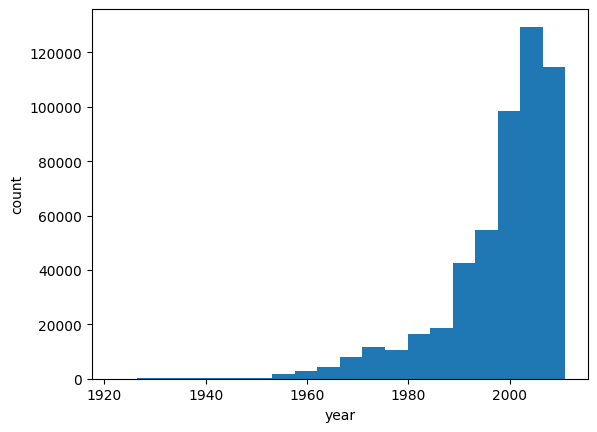

Range: 1922 - 2011
Unique values: 89


In [5]:
plt.hist(df.iloc[:, 0], bins=20)
plt.xlabel('year')
plt.ylabel('count')
plt.show()
print(f'Range: {df.iloc[:, 0].min()} - {df.iloc[:, 0].max()}')
print(f'Unique values: {np.unique(df.iloc[:, 0]).size}')

Разобьем данные на обучение и тест (не меняйте здесь ничего, чтобы сплит был одинаковым у всех).

In [6]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

train_size = int(0.75 * X.shape[0])

X_train = X[:train_size, :]
y_train = y[:train_size]
X_test = X[train_size:, :]
y_test = y[train_size:]

X_train.shape, X_test.shape

((386508, 90), (128837, 90))

## Полезные советы:

- Если вы сразу реализуете обучение на GPU, то у вас будет больше времени на эксперименты, так как любые вычисления будут работать быстрее. Google Colab предоставляет несколько GPU-часов (обычно около 8-10) в сутки бесплатно.

- Если вы чего-то не знаете, не стесняйтесь гуглить. В интернете очень много полезной информации, туториалов и советов по глубинному обучению и `pytorch`. Но не забывайте, что за списанный код без ссылки на источник последует наказание.

- Чтобы отладить код, можете обучаться на небольшой части данных или даже на одном батче. Если лосс на обучающей выборке не падает, то что-то точно идет не так.

- Пользуйтесь утилитами, которые вам предоставляет `pytorch` (например, `Dataset` и `Dataloader`). Их специально разработали для упрощения разработки пайплайна обучения.

- Скорее всего, вы захотите отслеживать прогресс обучения. Для создания прогресс-баров есть удобная библиотека `tqdm`.

- Быть может, вы захотите, чтобы графики рисовались прямо во время обучения. Можете воспользоваться функцией [clear_output](http://ipython.org/ipython-doc/dev/api/generated/IPython.display.html#IPython.display.clear_output), чтобы удалять старый график и рисовать новый на его месте.

- При желании вы можете логгировать метрики обучения и свои эксперименты в WandB либо любой другой сервис. Не забудьте приложить к тетрадке ссылку на результаты экспериментов либо скришноты графиков с пояснениями, что проверяющий должен на них увидеть.

- Финальное значение тестовой метрики для удобства проверки выведите в тетрадке.

## Задание 0 (0 баллов, но при невыполнении максимальная оценка за всю работу &mdash; 0 баллов)

Мы будем использовать RMSE как метрику качества. Прежде чем обучать нейронные сети, нам нужно проверить несколько простых бейзлайнов, чтобы было с чем сравнить более сложные алгоритмы. Для этого бучите `Ridge` регрессию из `sklearn`. Кроме того, посчитайте качество при наилучшем константном прогнозе.

Для выполнения данного задания (и всех последующих) предобработайте данные.

1. Зафиксируйте random_seed везде где только возможно. Вам предоставлена функция для этого, однако вы можете дополнить ее своими дополнениями.
2. Обучите `StandertScaler` и предобработайте ваши данные. В следующих заданиях можете использовать другой `scaler` или вообще отказаться от него.


In [7]:

def set_global_seed(seed: int) -> None:
    """Set global seed for reproducibility.
    :param int seed: Seed to be set
    """
    torch.backends.cudnn.deterministic = True
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    np.random.seed(seed)
    random.seed(seed)

    # также можно зафиксировать seed для Dataloader
    g = torch.Generator()
    g.manual_seed(seed)
    return g

# Сид для каждого worker в Dataloader
def seed_worker(worker_id):
    worker_seed = torch.initial_seed() % 2**32
    np.random.seed(worker_seed)
    random.seed(worker_seed)

g = set_global_seed(42)

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

scaler = StandardScaler()

X_train_scal = scaler.fit_transform(X_train)
X_test_scal = scaler.transform(X_test)

model = Ridge()
model.fit(X_train_scal, y_train)

y_pred = model.predict(X_test_scal)

rmse_for_model = np.sqrt(((y_test - y_pred)**2).mean())

# your code here  ⟅⎰᨟﹏᨟⎱⟆

print(f'RMSE Ridge регрессии: {rmse_for_model:.2f}')

RMSE Ridge регрессии: 9.47


Лучшая константа для RMSE это среднее. Используйте среднее, расчитанное на трэйне в качестве прогноза для теста и посчитайте для такой наивной модели RMSE.

In [9]:
# your code here  ⟅⎛ꌩωꌩ⎞⟆
y_mean = np.mean(y_train)
y_pred1 = np.ones(len(y_test)) * y_mean
best_rmse_metric = np.sqrt(((y_test - y_pred1)**2).mean())

print(f'RMSE наивной модели (константа): {best_rmse_metric:.2f}')

RMSE наивной модели (константа): 10.85


Теперь приступим к экспериментам с нейросетями. Для начала отделим от данных валидацию. Тестовую выборку мы будем использовать только для того, чтобы измерить итоговую метрику качества модели.

In [10]:
from sklearn.model_selection import train_test_split

g
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=0xE2E4)
X_train.shape, X_val.shape

((289881, 90), (96627, 90))

## Часть I. Обучаем линейную регрессию (максимум 10 баллов)

**Задание 1 (10 баллов):** Обучите в `pytorch` линейную регрессию.

- Создайте модель линейной регрессии, которая будет состоять только из одного `Linear()` слоя.
   
- Напишите цикл обучения вашей линейной регрессии. В нем реализуйте подсчет функции потерь, сделайте шаг градиентного спуска. Запрещено использовать готовые оптимизаторы и loss-функции из библиотеки `pytorch`. Для подсчета градиента воспользуйтесь методом backward.
   
- Запустите обучение на 10 эпохах, после каждой проверяйте значение целевой метрики на тестовой выборке.
   
- Выведите на экран графики метрики и значения функции потерь на тестовой и обучающей выборке.

В данном задании нет цели побить какой-то порог по метрике. Ваша задача &mdash; убедиться в том, что ваш рукописный цикл обучения работает. Для ускорения вычислений и обучения модели можете брать только срез данных, а не весь датасет.

In [11]:
# your code here (ง •̀_•́)ง
g

X_tr_m = torch.tensor(X_train[150000:], dtype=torch.float32).to(device)
y_tr_m = torch.tensor(y_train[150000:], dtype=torch.float32).to(device)

X_va_m = torch.tensor(X_val[45000:], dtype=torch.float32).to(device)
y_va_m = torch.tensor(y_val[45000:], dtype=torch.float32).to(device)

lr = 0.01
epochs = 10

def loss(y_pred, y_val):
    return torch.sqrt(((y_pred.squeeze() - y_val)**2).mean())

class MYLinReg(nn.Module):
    def __init__(self, in_features):
        super().__init__()
        self.model = nn.Linear(in_features=in_features, out_features = 1)
    def forward(self, x):
        return self.model(x)

model = MYLinReg(in_features=X_tr_m.shape[1]).to(device)

lr = 0.0001
epochs = 10

train_losses = []
val_losses = []

from IPython.display import clear_output

for e in range(epochs):
    model.train()

    y_tr_pred = model(X_tr_m)
    loss_tr = loss(y_tr_pred, y_tr_m)

    model.zero_grad()

    loss_tr.backward()

    with torch.no_grad():
        for w in model.parameters():
            w -= lr * w.grad

    model.eval()
    with torch.no_grad():
        y_val_pred = model(X_va_m)
        loss_val = loss(y_val_pred, y_va_m)

    train_losses.append(loss_tr.item())
    val_losses.append(loss_val.item())

    print(f'Эпоха {e+1}: train loss = {loss_tr.item():.2f}, val loss = {loss_val.item():.2f}')

Эпоха 1: train loss = 1812.75, val loss = 917.30
Эпоха 2: train loss = 920.50, val loss = 905.19
Эпоха 3: train loss = 907.05, val loss = 893.71
Эпоха 4: train loss = 895.63, val loss = 885.21
Эпоха 5: train loss = 886.16, val loss = 877.72
Эпоха 6: train loss = 878.75, val loss = 873.35
Эпоха 7: train loss = 873.71, val loss = 871.20
Эпоха 8: train loss = 871.59, val loss = 873.03
Эпоха 9: train loss = 873.09, val loss = 878.99
Эпоха 10: train loss = 878.90, val loss = 889.08


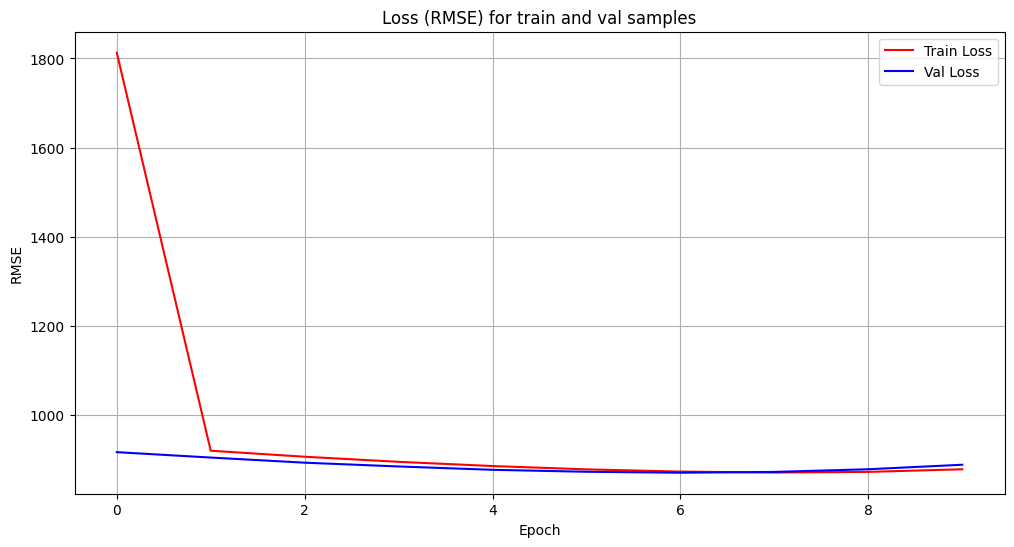

In [12]:
plt.figure(figsize = (12, 6))
plt.plot(train_losses, label = 'Train Loss', color='red')
plt.plot(val_losses, label='Val Loss', color='blue')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title('Loss (RMSE) for train and val samples')
plt.legend()
plt.grid(True)
plt.show()

## Часть II. Заводим нейронную сеть (максимум 10 баллов)

Ниже нам предстоит реализовать довольно много различных нейросетей и поставить целую серию экспериментов. Чтобы это всё происходило без боли и страданий, нам нужно держать код в удобном виде.

При решении заданий вы можете придерживаться любой адекватной струкуры кода, но мы советуем воспользоваться сигнатурами функций, которые приведены ниже. При необходимости вы можете добавить в них любые нужные вам аргументы и любой нужный функционал. Более того, хорошей практикой является не делать эти функции слишком громоздкими и выносить разные хитрые штуки в отдельные функции.

In [13]:
def training_epoch(model, optimizer, criterion, train_loader):
    """Одна эпоха обучения
    params:
        model - torch.nn.Module to be fitted
        optimizer - model optimizer
        criterion - loss function from torch.nn
        train_loader - torch.utils.data.Dataloader with train set
    """

    # your code here  ♪┏(・o･)┛♪
    train_loss = 0.0
    model.train()

    for X, y in tqdm(train_loader, desc='train'):
        X, y = X.to(device), y.to(device)

        optimizer.zero_grad()
        logits = model(X)
        loss = criterion(logits, y)
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * X.shape[0]

    train_loss /= len(train_loader.dataset)
    if device == 'cuda':
        torch.cuda.empty_cache()
    return train_loss


@torch.no_grad()
def validation_epoch(model, criterion, val_loader):
    """Одна эпоха валидации модели
    params:
        model - torch.nn.Module to be fitted
        criterion - loss function from torch.nn
        val_loader - torch.utils.data.Dataloader with test set
                      (if you wish to validate during training)
    """

    # your code here   ฅ^•ﻌ•^ฅ

    val_loss = 0
    model.eval()
    for X, y in tqdm(val_loader, desc='val'):
        X, y = X.to(device), y.to(device)

        logits = model(X)
        loss = criterion(logits, y)

        val_loss += loss.item() * X.shape[0]

    val_loss /= len(val_loader.dataset)
    return val_loss


@torch.no_grad()
def predict(model, data_loader):
    """ Предсказания модели
    params:
        model - torch.nn.Module to be evaluated on test set
        criterion - loss function from torch.nn
        data_loader - torch.utils.data.Dataloader with test set
    ----------
    returns:
        predicts - torch.tensor with shape (len(test_loader.dataset), ),
                   which contains predictions for test objects
    """

    # your code here  =^･ω･^=

    model.eval()
    preds = []

    for X, y in data_loader:
        X = X.to(device)
        logits = model(X)
        preds.append(logits.cpu())

    predicts = torch.cat(preds, dim=0).squeeze()
    return predicts


def train(model, optimizer, criterion, train_loader, val_loader, epochs):
    """ Обучение модели
    params:
        model - torch.nn.Module to be fitted
        optimizer - model optimizer
        criterion - loss function from torch.nn
        train_loader - torch.utils.data.Dataloader with train set
        val_loader - torch.utils.data.Dataloader with test set
                      (if you wish to validate during training)
        epochs - number of training epochs
    """

    # your code here  ¯\_(ツ)_/¯

    loss_tr = []
    loss_val = []

    for e in range(epochs):
        train_loss = training_epoch(model, optimizer, criterion, train_loader)
        val_loss = validation_epoch(model, criterion, val_loader)

        loss_tr.append(train_loss)
        loss_val.append(val_loss)

        print(f'Epoch {e+1}/{epochs}: Train Loss = {train_loss:.4f}, Val Loss = {val_loss:.4f}')

    return loss_tr, loss_val

**Задание 2 (2 балла)**

Попробуем обучить нашу первую нейронную сеть. Здесь целевая переменная дискретная &mdash; это год выпуска песни. Поэтому будем учить сеть на классификацию.

- В качестве архитектуры сети возьмите два линейных слоя с активацией ReLU между ними c числом скрытых нейронов, равным 128.
- Используйте SGD с `lr=1e-3`.
- Возьмите размер мини-батча около 32-64, примерно 3-4 эпох обучения должно быть достаточно.
- Также преобразуйте целевую переменную так, чтобы ее значения принимали значения от $0$ до $C-1$, где $C$ &mdash; число классов (лучше передайте преобразованное значение в DataLoader, исходное нам еще пригодится)
- В качестве метрики качества мы используем RMSE. При его подсчёте вам нужно заменить предсказанный нейросеткой класс на конкретный год выпуска песни и использовать его как прогноз.

In [14]:
# your code here (￣ω￣)
g

from torch.utils.data import Dataset, DataLoader

def years0c1(years):
    years1 = sorted(np.unique(years))
    year_class = {year: i for i, year in enumerate(years1)}
    classes = np.array([year_class[y] for y in years])

    return classes, year_class, years1

class SongsDS(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        classes, self.year_class, self.years1 = years0c1(y)
        self.y = torch.tensor(classes, dtype=torch.int64)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]


class GUESSNet(nn.Module):
    def __init__(self, input_dim, num_classes):
        super().__init__()
        self.model = nn.Sequential(
          nn.Linear(input_dim, 128),
          nn.ReLU(),
          nn.Linear(128, num_classes)
        )

    def forward(self, x):
        return self.model(x)

@torch.no_grad()
def rmse(model, dataloader, classes, device):
    model.eval()
    thepreds, thetrue = [], []
    for X, y in dataloader:
        X, y = X.to(device), y.to(device)
        logits = model(X)
        preds = torch.argmax(logits, dim=1).cpu().numpy()
        true = y.cpu().numpy()

        pred_years = [classes[p] for p in preds]
        true_years = [classes[t] for t in true]

        thepreds.extend(pred_years)
        thetrue.extend(true_years)

    thepreds = np.array(thepreds)
    thetrue = np.array(thetrue)

    return np.sqrt(((thepreds - thetrue)**2).mean())


train_ds = SongsDS(X_train, y_train)
val_ds = SongsDS(X_val, y_val)

train_loader = DataLoader(train_ds, batch_size=64, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=64)

model = GUESSNet(input_dim=X_train.shape[1], num_classes=len(train_ds.years1)).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

train(model, optimizer, criterion, train_loader, val_loader, epochs=4)

rmse_val = rmse(model, val_loader, train_ds.years1, device)
print(f'RMSE на валидации: {rmse_val:.2f}')

train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 1/4: Train Loss = 4.7147, Val Loss = 4.3612


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 2/4: Train Loss = 4.2910, Val Loss = 4.2447


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 3/4: Train Loss = 4.1774, Val Loss = 4.1450


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 4/4: Train Loss = 4.0805, Val Loss = 4.0600
RMSE на валидации: 14.61


**Задание 3 (1 балл).** Прокомментируйте ваши наблюдения. Удалось ли побить бейзлайн? Как вы думаете, хорошая ли идея учить классификатор для этой задачи? Почему?

**Ответ:** RMSE в данном случае получилось больше, чем RMSE для Ridge регрессии (9.47) и RMSE для константного прогноза (10.85), то есть побить бейзлайн нам не удалось( Возможно, это из-за того, что классификация не совсем подходит для данной задачи (так как нам нужно предсказть год песни, то есть число). В данном случае задача регресии должа дать результат лучше


**Задание 4 (2 балла).** Теперь попробуем решать задачу как регрессию. Обучите нейронную сеть на MSE.

- Используйте такие же гиперпараметры обучения.
- Когда передаете целевую переменную в DataLoader, сделайте reshape в (-1, 1).
- Если что-то пойдет не так, можете попробовать меньшие значения `lr`.

In [15]:
# your code here ( ⚆ _ ⚆)
g

class SongsDSregr(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]


class GUESSregrNet(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.model = nn.Sequential(
          nn.Linear(input_dim, 128),
          nn.ReLU(),
          nn.Linear(128, 1)
        )

    def forward(self, x):
        return self.model(x)


@torch.no_grad()
def rmseregr(model, dataloader, device):
    model.eval()
    thepreds, thetrue = [], []
    for X, y in dataloader:
        X, y = X.to(device), y.to(device)
        pred = model(X).cpu()
        true = y.cpu()

        thepreds.append(pred)
        thetrue.append(true)

    thepreds = torch.cat(thepreds, dim=0)
    thetrue = torch.cat(thetrue, dim=0)

    return torch.sqrt(((thepreds - thetrue)**2).mean()).item()


train_ds1 = SongsDSregr(X_train, y_train)
val_ds1 = SongsDSregr(X_val, y_val)

train_loader1 = DataLoader(train_ds1, batch_size=64, shuffle=True)
val_loader1 = DataLoader(val_ds1, batch_size=64)

model1 = GUESSregrNet(input_dim=X_train.shape[1]).to(device)
criterion1 = nn.MSELoss()
optimizer1 = torch.optim.SGD(model1.parameters(), lr=1e-8)

train(model1, optimizer1, criterion1, train_loader1, val_loader1, epochs=4)

rmse_val1 = rmseregr(model1, val_loader1, device)
print(f'RMSE на валидации: {rmse_val1:.2f}')

train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 1/4: Train Loss = 363604.7666, Val Loss = 331894.7266


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 2/4: Train Loss = 247475.5630, Val Loss = 184694.6942


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 3/4: Train Loss = 201305.1313, Val Loss = 246842.3581


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 4/4: Train Loss = 162225.8706, Val Loss = 114438.8727
RMSE на валидации: 338.29


**Задание 5 (1 балл).** Получилось ли у вас стабилизировать обучение? Помогли ли меньшие значения `lr`? Стало ли лучше от замены классификации на регрессию? Как вы думаете, почему так происходит? В качестве подсказки можете посмотреть на распределение целевой переменной и магнитуду значений признаков.

**Ответ:** Меньшие значения lr помогли стабилизировать обучение (теперь Train Loss, Val Loss определены, нет "NaN" и нет константного прогноза, с которым я боролась весь день, а оказалось, что проблема в lr...), однако значение RMSE на валидационной выборке очень большое, больше, чем в предыдущих моделях в несколько раз. Скорее всего это связано с тем, что распределение целевой переменной имеет левостороннюю асимметрию, то есть "старые" песни встречаются гораздо реже, чем более новые. Также различаются масштабы признаков и целевой перемнной (признаки представляют числа до тысяч, а целевая переменная - год, то есть число больше одной тысячи). Необоходимо нормализовать данные для улучшения качества модели.

**Задание 6 (1 балл).** Начнем с того, что попробуем отнормировать целевую переменную. Для этого воспользуемся min-max нормализацией, чтобы целевая переменная принимала значения от 0 до 1. Реализуйте функции `normalize` и `denormalize`, которые, соответственно, нормируют целевую переменную и применяют обратное преобразование. Минимум и максимум оцените по обучающей выборке (то есть эти константы должны быть фиксированными и не зависеть от передаваемой выборки).

In [16]:
y_min = y_train.min()
y_max = y_train.max()

def normalize(sample):
    """
    Min-max normalization to convert sample to [0, 1] range
    """
    # your code here ᕦ(ò_óˇ)ᕤ
    return (sample - y_min) / (y_max - y_min)

def denormalize(sample):
    """
    Denormalize sample from [0, 1] to initial range
    """
    # your code here ( ⚆ ω ⚆)
    return sample * (y_max - y_min) + y_min

**Задание 7 (1 балл)** Теперь повторите эксперимент из **задания 4**, обучаясь на нормированной целевой переменной. Сделаем также еще одно изменение: добавим сигмоидную активацию после последнего линейного слоя сети. Таким образом мы гарантируем, что нейронная сеть предсказывает числа из промежутка $[0, 1]$. Использование активации - довольно распространенный прием, когда мы хотим получить числа из определенного диапазона значений.

In [17]:
# your code here ( ⚆ _ ⚆)
g

class SongsDSregrNorm(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(normalize(y), dtype=torch.float32).reshape(-1, 1)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]


class GUESSregrNetSIGMA(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.model = nn.Sequential(
          nn.Linear(input_dim, 128),
          nn.ReLU(),
          nn.Linear(128, 1),
          nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)


@torch.no_grad()
def rmseregr_norm(model, dataloader, device):
    model.eval()
    thepreds, thetrue = [], []
    for X, y in dataloader:
        X, y = X.to(device), y.to(device)
        pred = model(X).cpu()
        true = y.cpu()

        thepreds.append(pred)
        thetrue.append(true)

    thepreds = denormalize(torch.cat(thepreds, dim=0))
    thetrue = denormalize(torch.cat(thetrue, dim=0))

    return torch.sqrt(((thepreds - thetrue)**2).mean()).item()


train_ds2 = SongsDSregrNorm(X_train, y_train)
val_ds2 = SongsDSregrNorm(X_val, y_val)

train_loader2 = DataLoader(train_ds2, batch_size=64, shuffle=True)
val_loader2 = DataLoader(val_ds2, batch_size=64)

model2 = GUESSregrNetSIGMA(input_dim=X_train.shape[1]).to(device)
criterion2 = nn.MSELoss()
optimizer2 = torch.optim.SGD(model2.parameters(), lr=1e-6)

train(model2, optimizer2, criterion2, train_loader2, val_loader2, epochs=4)

rmse_val2 = rmseregr_norm(model2, val_loader2, device)
print(f'RMSE на валидации: {rmse_val2:.2f}')

train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 1/4: Train Loss = 0.1600, Val Loss = 0.0474


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 2/4: Train Loss = 0.0429, Val Loss = 0.0405


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 3/4: Train Loss = 0.0395, Val Loss = 0.0388


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 4/4: Train Loss = 0.0381, Val Loss = 0.0378
RMSE на валидации: 17.31


**Задание 8 (2 балла).** На этот раз попробуем отнормировать не только целевую переменную, но и сами данные, которые подаются сети на вход. Для них будем использовать нормализацию через среднее и стандартное отклонение. Преобразуйте данные и повторите прошлый эксперимент. Скорее всего, имеет смысл увеличить число эпох обучения.

In [18]:
from sklearn.preprocessing import StandardScaler

# your code here  ( ͡° ͜ʖ ͡°)
g

scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_val_sc = scaler.transform(X_val)

train_ds3 = SongsDSregrNorm(X_train_sc, y_train)
val_ds3 = SongsDSregrNorm(X_val_sc, y_val)

train_loader3 = DataLoader(train_ds3, batch_size=64, shuffle=True)
val_loader3 = DataLoader(val_ds3, batch_size=64)

model3 = GUESSregrNetSIGMA(input_dim=X_train_sc.shape[1]).to(device)
criterion3 = nn.MSELoss()
optimizer3 = torch.optim.SGD(model3.parameters(), lr=1e-3)

train(model3, optimizer3, criterion3, train_loader3, val_loader3, epochs=10)

rmse_val3 = rmseregr_norm(model3, val_loader3, device)
print(f'RMSE на валидации: {rmse_val3:.2f}')

train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 1/10: Train Loss = 0.0415, Val Loss = 0.0192


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 2/10: Train Loss = 0.0170, Val Loss = 0.0161


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 3/10: Train Loss = 0.0155, Val Loss = 0.0153


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 4/10: Train Loss = 0.0149, Val Loss = 0.0149


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 5/10: Train Loss = 0.0146, Val Loss = 0.0146


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 6/10: Train Loss = 0.0143, Val Loss = 0.0143


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 7/10: Train Loss = 0.0141, Val Loss = 0.0141


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 8/10: Train Loss = 0.0139, Val Loss = 0.0139


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 9/10: Train Loss = 0.0137, Val Loss = 0.0138


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 10/10: Train Loss = 0.0136, Val Loss = 0.0137
RMSE на валидации: 10.40


RMSE снизился и стал похож на RMSE Ridge регрессии, ура-ура!!

Если вы все сделали правильно, то у вас должно было получиться качество, сравнимое с `Ridge` регрессией.

**Мораль:** как видите, нам пришлось сделать очень много хитрых телодвижений, чтобы нейронная сеть работала хотя бы так же, как и простая линейная модель. Здесь, конечно, показан совсем экстремальный случай, когда без нормализации данных нейронная сеть просто не учится. Как правило, в реальности завести нейронную сеть из коробки не очень сложно, но вот заставить ее работать на полную &mdash; куда более трудоемкая задача. Написание пайплайнов обучения нейросетевых моделей требует большой аккуратности, а дебаг часто превращается в угадайку. К счастью, очень часто на помощь приходит интуиция, и мы надеемся, что вы сможете выработать ее в течение нашего курса. Начнем с двух советов, которые стоит принять на вооружение:

- Обязательно начинаем любые эксперименты с бейзлайнов: без них мы бы не поняли, что нейронная сеть не учится в принципе.
- При постановке эксперментов старайтесь делать минимальное количество изменений за раз (в идеале одно!): только так можно понять, какие конкретно изменения влияют на результат.

## Часть III. Улучшаем нейронную сеть (максимум 10 баллов)

Продолжим экспериментировать с нейронной сетью, чтобы добиться еще лучшего качества.

**Задание 9 (1 балл).** Давайте попробуем другие оптимизаторы. Обучите нейросеть с помощью SGD+momentum и Adam. Опишите свои наблюдения и в дальнейших запусках используйте лучший оптимизатор. Для Adam обычно берут learning rate поменьше, в районе $10^{-3}$.

In [19]:
# your code here  ( ཀ ʖ̯ ཀ)
g
optimizer_mom = torch.optim.SGD(model3.parameters(), lr=1e-3, momentum=0.9)

train(model3, optimizer_mom, criterion3, train_loader3, val_loader3, epochs=10)

rmse_val_mom = rmseregr_norm(model3, val_loader3, device)
print(f'RMSE на валидации: {rmse_val_mom:.2f}')

train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 1/10: Train Loss = 0.0131, Val Loss = 0.0129


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 2/10: Train Loss = 0.0126, Val Loss = 0.0124


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 3/10: Train Loss = 0.0122, Val Loss = 0.0121


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 4/10: Train Loss = 0.0119, Val Loss = 0.0119


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 5/10: Train Loss = 0.0117, Val Loss = 0.0117


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 6/10: Train Loss = 0.0116, Val Loss = 0.0116


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 7/10: Train Loss = 0.0114, Val Loss = 0.0115


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 8/10: Train Loss = 0.0113, Val Loss = 0.0114


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 9/10: Train Loss = 0.0112, Val Loss = 0.0113


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 10/10: Train Loss = 0.0111, Val Loss = 0.0112
RMSE на валидации: 9.42


In [20]:
g
optimizer_Adam = torch.optim.Adam(model3.parameters(), lr=1e-3)

train(model3, optimizer_Adam, criterion3, train_loader3, val_loader3, epochs=10)

rmse_val_Adam = rmseregr_norm(model3, val_loader3, device)
print(f'RMSE на валидации: {rmse_val_Adam:.2f}')

train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 1/10: Train Loss = 0.0103, Val Loss = 0.0102


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 2/10: Train Loss = 0.0099, Val Loss = 0.0100


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 3/10: Train Loss = 0.0098, Val Loss = 0.0100


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 4/10: Train Loss = 0.0096, Val Loss = 0.0100


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 5/10: Train Loss = 0.0096, Val Loss = 0.0099


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 6/10: Train Loss = 0.0095, Val Loss = 0.0099


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 7/10: Train Loss = 0.0094, Val Loss = 0.0099


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 8/10: Train Loss = 0.0093, Val Loss = 0.0099


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 9/10: Train Loss = 0.0093, Val Loss = 0.0099


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 10/10: Train Loss = 0.0092, Val Loss = 0.0098
RMSE на валидации: 8.82


Adam показал более низкое значение RMSE на валидационной выборке по сравнению с SGD с momentum, также значения лосса на каждой эпоху при Adam меньше, поэтому это лучший оптимизатор в данном случае.

**Задание 10 (1 балл).** Теперь сделаем нашу нейронную сеть более сложной. Попробуйте сделать сеть:

- более широкой (то есть увеличить размерность скрытого слоя, например, вдвое)
- более глубокой (то есть добавить еще один скрытый слой)

In [21]:
# your code here  (๑-﹏-๑)
g

class GUESSregrNetSIGMANew(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.model = nn.Sequential(
          nn.Linear(input_dim, 256),
          nn.ReLU(),
          nn.Linear(256, 128),
          nn.ReLU(),
          nn.Linear(128, 1),
          nn.Sigmoid(),
        )

    def forward(self, x):
        return self.model(x)

model4 = GUESSregrNetSIGMANew(input_dim=X_train_sc.shape[1]).to(device)
optimizer_Adam = torch.optim.Adam(model4.parameters(), lr=1e-3)

train(model4, optimizer_Adam, criterion3, train_loader3, val_loader3, epochs=10)

rmse_val_Adam = rmseregr_norm(model4, val_loader3, device)
print(f'RMSE на валидации: {rmse_val_Adam:.2f}')

train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 1/10: Train Loss = 0.0107, Val Loss = 0.0102


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 2/10: Train Loss = 0.0098, Val Loss = 0.0099


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 3/10: Train Loss = 0.0095, Val Loss = 0.0099


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 4/10: Train Loss = 0.0093, Val Loss = 0.0098


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 5/10: Train Loss = 0.0091, Val Loss = 0.0096


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 6/10: Train Loss = 0.0090, Val Loss = 0.0096


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 7/10: Train Loss = 0.0088, Val Loss = 0.0096


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 8/10: Train Loss = 0.0086, Val Loss = 0.0096


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 9/10: Train Loss = 0.0084, Val Loss = 0.0096


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 10/10: Train Loss = 0.0082, Val Loss = 0.0098
RMSE на валидации: 8.79


Опишите, как увеличение числа параметров модели влияет на качество на обучающей и валидационной выборках (без их описания за работу ставится ноль баллов)

__Ваше подробное описание:__ Увеличение числа параметров модели помогло сделать ее более мощной, лосс на трейне и владиции уменьшился, снизился RMSE на валидационной выборке по сравнению с предыдущей моделью. Однако появилась проблема переобучения: лосс на валидации сначала уменьшался, потом опять вырос, модель начала подстраиваться под данные, ее обобщающая способность снизилась

**Задание 11 (1 балл).** Как вы должны были заметить, более сложная модель стала сильнее переобучаться. Попробуем разные методы регуляризации, чтобы бороться с переобучением. Проведите два эксперимента:

- Добавьте слой дропаута с параметром $p=0.2$ после каждого линейного слоя, кроме последнего.
- Попробуйте batch-нормализацию вместо дропаута. Строго говоря, batch-нормализация не является методом регуляризации, но никто не запрещает нам экспериментировать с ней.

**ЭКСПЕРИМЕНТ 1**

In [22]:
# your code here (❍ᴥ❍ʋ)
g

class GUESSregrNetSIGMANewDROP(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.model = nn.Sequential(
          nn.Linear(input_dim, 256),
          nn.ReLU(),
          nn.Dropout(0.2),
          nn.Linear(256, 128),
          nn.ReLU(),
          nn.Dropout(0.2),
          nn.Linear(128, 1),
          nn.Sigmoid(),
        )

    def forward(self, x):
        return self.model(x)

model5 = GUESSregrNetSIGMANewDROP(input_dim=X_train_sc.shape[1]).to(device)
optimizer_Adam = torch.optim.Adam(model5.parameters(), lr=1e-3)

train(model5, optimizer_Adam, criterion3, train_loader3, val_loader3, epochs=10)

rmse_val_Adam = rmseregr_norm(model5, val_loader3, device)
print(f'RMSE на валидации: {rmse_val_Adam:.2f}')

train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 1/10: Train Loss = 0.0111, Val Loss = 0.0103


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 2/10: Train Loss = 0.0101, Val Loss = 0.0100


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 3/10: Train Loss = 0.0099, Val Loss = 0.0099


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 4/10: Train Loss = 0.0098, Val Loss = 0.0098


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 5/10: Train Loss = 0.0097, Val Loss = 0.0097


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 6/10: Train Loss = 0.0096, Val Loss = 0.0097


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 7/10: Train Loss = 0.0095, Val Loss = 0.0096


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 8/10: Train Loss = 0.0094, Val Loss = 0.0097


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 9/10: Train Loss = 0.0093, Val Loss = 0.0096


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 10/10: Train Loss = 0.0093, Val Loss = 0.0095
RMSE на валидации: 8.68


**ЭКСПЕРИМЕНТ 2**

In [23]:
# your code here (❍ᴥ❍ʋ)
g

class GUESSregrNetSIGMANewBATCH(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.model = nn.Sequential(
          nn.Linear(input_dim, 256),
          nn.ReLU(),
          nn.BatchNorm1d(256),
          nn.Linear(256, 128),
          nn.ReLU(),
          nn.BatchNorm1d(128),
          nn.Linear(128, 1),
          nn.Sigmoid(),
        )

    def forward(self, x):
        return self.model(x)

model6 = GUESSregrNetSIGMANewBATCH(input_dim=X_train_sc.shape[1]).to(device)
optimizer_Adam = torch.optim.Adam(model6.parameters(), lr=1e-3)

train(model6, optimizer_Adam, criterion3, train_loader3, val_loader3, epochs=10)

rmse_val_Adam = rmseregr_norm(model6, val_loader3, device)
print(f'RMSE на валидации: {rmse_val_Adam:.2f}')

train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 1/10: Train Loss = 0.0127, Val Loss = 0.0102


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 2/10: Train Loss = 0.0099, Val Loss = 0.0100


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 3/10: Train Loss = 0.0097, Val Loss = 0.0097


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 4/10: Train Loss = 0.0095, Val Loss = 0.0096


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 5/10: Train Loss = 0.0093, Val Loss = 0.0096


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 6/10: Train Loss = 0.0092, Val Loss = 0.0096


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 7/10: Train Loss = 0.0090, Val Loss = 0.0096


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 8/10: Train Loss = 0.0089, Val Loss = 0.0095


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 9/10: Train Loss = 0.0088, Val Loss = 0.0095


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 10/10: Train Loss = 0.0087, Val Loss = 0.0096
RMSE на валидации: 8.70


Опишите результаты экспериментов (без их описания за работу ставится ноль баллов)

__Ваше подробное описание:__ И Dropout, и Batch Normalization помогли снизить переобучение: лосс на трейне возрос, а на валидации - снизился, также RMSE уменьшилась. Модель теперь не так сильно запоминает обучающиее данные. Однако Dropout показал лучшее качество на валидации, поэтому берем его

**Задание 12 (1 балл).** Теперь, когда мы определились с выбором архитектуры нейронной сети, пора заняться рутиной DL-инженера &mdash; перебором гиперпараметров. Подберите оптимальное значение lr по значению RMSE на валидации (по логарифмической сетке, достаточно посмотреть 3-4 значения). Затем подберите оптимальное значение weight decay для данного lr (тоже по логарифмической сетке, типичные значения этого параметра лежат в диапазоне $[10^{-6}, 10^{-3}]$, но не забудьте включить нулевое значение в сетку). Постройте графики зависимости RMSE на трейне и на валидации от значений параметров. Прокомментируйте получившиеся зависимости.

In [24]:
# your code here (｡❤‿❤｡)
lrs = [1e-5, 1e-4, 1e-3, 1e-2]

rmses_train, rmses_val = [], []

for lr in lrs:
    print(f'\nlr = {lr}:')
    model_lr = GUESSregrNetSIGMANewDROP(input_dim=X_train_sc.shape[1]).to(device)
    optimizer_Adam = torch.optim.Adam(model_lr.parameters(), lr=lr)

    train(model_lr, optimizer_Adam, criterion3, train_loader3, val_loader3, epochs=10)
    rmses_train.append(rmseregr_norm(model_lr, train_loader3, device))
    rmse_val = rmseregr_norm(model_lr, val_loader3, device)
    rmses_val.append(rmse_val)

best_i = np.argmin(rmses_train)
best_lr = lrs[best_i]
best_rmse = rmses_train[best_i]

print(f'Лучшее для трейна:')
print(f'RMSE: {best_rmse:.2f}, lr = {best_lr}')

best_i1 = np.argmin(rmses_val)
best_lr1 = lrs[best_i1]
best_rmse1 = rmses_val[best_i1]

print(f'Лучшее для валидации:')
print(f'RMSE: {best_rmse1:.2f}, lr = {best_lr1}')


lr = 1e-05:


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 1/10: Train Loss = 0.0284, Val Loss = 0.0136


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 2/10: Train Loss = 0.0132, Val Loss = 0.0124


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 3/10: Train Loss = 0.0123, Val Loss = 0.0118


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 4/10: Train Loss = 0.0119, Val Loss = 0.0115


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 5/10: Train Loss = 0.0116, Val Loss = 0.0112


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 6/10: Train Loss = 0.0114, Val Loss = 0.0111


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 7/10: Train Loss = 0.0113, Val Loss = 0.0109


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 8/10: Train Loss = 0.0111, Val Loss = 0.0108


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 9/10: Train Loss = 0.0110, Val Loss = 0.0107


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 10/10: Train Loss = 0.0109, Val Loss = 0.0107

lr = 0.0001:


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 1/10: Train Loss = 0.0137, Val Loss = 0.0108


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 2/10: Train Loss = 0.0108, Val Loss = 0.0103


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 3/10: Train Loss = 0.0104, Val Loss = 0.0101


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 4/10: Train Loss = 0.0102, Val Loss = 0.0100


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 5/10: Train Loss = 0.0100, Val Loss = 0.0099


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 6/10: Train Loss = 0.0099, Val Loss = 0.0098


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 7/10: Train Loss = 0.0098, Val Loss = 0.0097


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 8/10: Train Loss = 0.0097, Val Loss = 0.0097


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 9/10: Train Loss = 0.0096, Val Loss = 0.0096


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 10/10: Train Loss = 0.0095, Val Loss = 0.0096

lr = 0.001:


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 1/10: Train Loss = 0.0110, Val Loss = 0.0101


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 2/10: Train Loss = 0.0101, Val Loss = 0.0100


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 3/10: Train Loss = 0.0099, Val Loss = 0.0099


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 4/10: Train Loss = 0.0098, Val Loss = 0.0098


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 5/10: Train Loss = 0.0097, Val Loss = 0.0097


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 6/10: Train Loss = 0.0096, Val Loss = 0.0096


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 7/10: Train Loss = 0.0095, Val Loss = 0.0096


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 8/10: Train Loss = 0.0094, Val Loss = 0.0096


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 9/10: Train Loss = 0.0093, Val Loss = 0.0095


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 10/10: Train Loss = 0.0093, Val Loss = 0.0095

lr = 0.01:


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 1/10: Train Loss = 0.0116, Val Loss = 0.0109


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 2/10: Train Loss = 0.0113, Val Loss = 0.0106


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 3/10: Train Loss = 0.0112, Val Loss = 0.0106


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 4/10: Train Loss = 0.0111, Val Loss = 0.0105


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 5/10: Train Loss = 0.0111, Val Loss = 0.0105


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 6/10: Train Loss = 0.0110, Val Loss = 0.0106


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 7/10: Train Loss = 0.0110, Val Loss = 0.0104


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 8/10: Train Loss = 0.0109, Val Loss = 0.0104


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 9/10: Train Loss = 0.0109, Val Loss = 0.0105


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 10/10: Train Loss = 0.0110, Val Loss = 0.0103
Лучшее для трейна:
RMSE: 8.30, lr = 0.001
Лучшее для валидации:
RMSE: 8.69, lr = 0.001


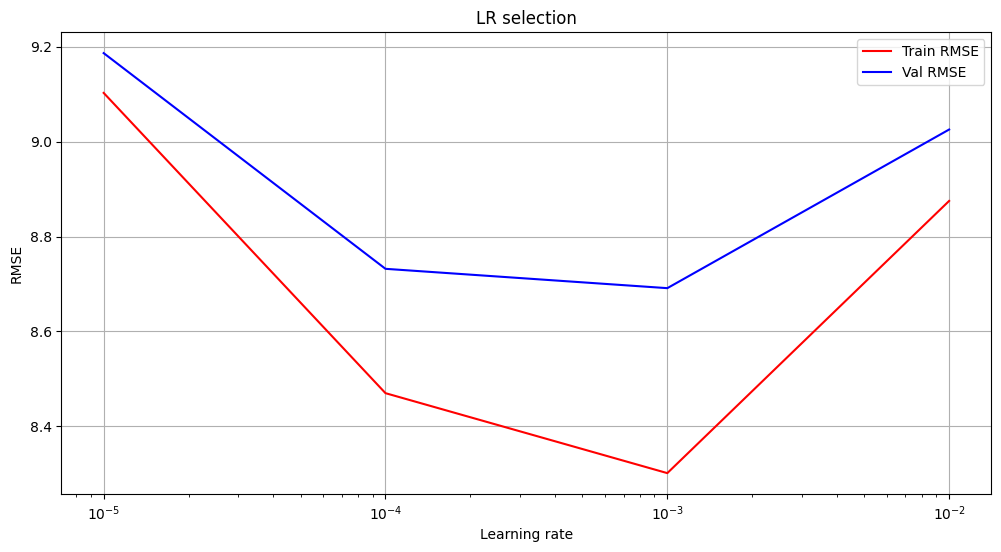

In [25]:
plt.figure(figsize = (12, 6))
plt.plot(lrs, rmses_train, label = 'Train RMSE', color='red')
plt.plot(lrs, rmses_val, label='Val RMSE', color='blue')
plt.xscale('log')
plt.xlabel('Learning rate')
plt.ylabel('RMSE')
plt.title('LR selection')
plt.legend()
plt.grid(True)
plt.show()

При lr=1e-3 достигается минимальное значение RMSE как на обучающей, так и на валидационной выборках, поэтому дальше будем использовать это значение

In [26]:
# your code here (｡❤‿❤｡)
wds = [0, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2]

rmses_train1, rmses_val1 = [], []

for wd in wds:
    print(f'\nwd = {wd}:')
    model_wd = GUESSregrNetSIGMANewDROP(input_dim=X_train_sc.shape[1]).to(device)
    optimizer_Adam = torch.optim.Adam(model_wd.parameters(), lr=1e-3, weight_decay=wd)

    train(model_wd, optimizer_Adam, criterion3, train_loader3, val_loader3, epochs=10)
    rmses_train1.append(rmseregr_norm(model_wd, train_loader3, device))
    rmses_val1.append(rmseregr_norm(model_wd, val_loader3, device))

best_id = np.argmin(rmses_train1)
best_wd = wds[best_id]
best_rmsew = rmses_train1[best_id]

print(f'Лучшее для трейна:')
print(f'RMSE: {best_rmsew:.2f}, wd = {best_wd}')

best_id1 = np.argmin(rmses_val1)
best_wd1 = wds[best_id1]
best_rmsew1 = rmses_val1[best_id1]

print(f'Лучшее для валидации:')
print(f'RMSE: {best_rmsew1:.2f}, wd = {best_wd1}')


wd = 0:


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 1/10: Train Loss = 0.0109, Val Loss = 0.0100


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 2/10: Train Loss = 0.0101, Val Loss = 0.0099


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 3/10: Train Loss = 0.0099, Val Loss = 0.0099


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 4/10: Train Loss = 0.0098, Val Loss = 0.0098


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 5/10: Train Loss = 0.0097, Val Loss = 0.0097


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 6/10: Train Loss = 0.0096, Val Loss = 0.0097


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 7/10: Train Loss = 0.0095, Val Loss = 0.0097


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 8/10: Train Loss = 0.0094, Val Loss = 0.0096


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 9/10: Train Loss = 0.0093, Val Loss = 0.0095


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 10/10: Train Loss = 0.0093, Val Loss = 0.0095

wd = 1e-06:


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 1/10: Train Loss = 0.0110, Val Loss = 0.0104


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 2/10: Train Loss = 0.0101, Val Loss = 0.0100


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 3/10: Train Loss = 0.0099, Val Loss = 0.0099


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 4/10: Train Loss = 0.0098, Val Loss = 0.0098


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 5/10: Train Loss = 0.0097, Val Loss = 0.0098


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 6/10: Train Loss = 0.0097, Val Loss = 0.0097


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 7/10: Train Loss = 0.0096, Val Loss = 0.0097


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 8/10: Train Loss = 0.0095, Val Loss = 0.0097


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 9/10: Train Loss = 0.0095, Val Loss = 0.0096


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 10/10: Train Loss = 0.0094, Val Loss = 0.0095

wd = 1e-05:


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 1/10: Train Loss = 0.0110, Val Loss = 0.0102


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 2/10: Train Loss = 0.0102, Val Loss = 0.0102


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 3/10: Train Loss = 0.0101, Val Loss = 0.0100


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 4/10: Train Loss = 0.0101, Val Loss = 0.0100


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 5/10: Train Loss = 0.0100, Val Loss = 0.0100


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 6/10: Train Loss = 0.0100, Val Loss = 0.0100


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 7/10: Train Loss = 0.0099, Val Loss = 0.0099


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 8/10: Train Loss = 0.0099, Val Loss = 0.0099


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 9/10: Train Loss = 0.0099, Val Loss = 0.0099


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 10/10: Train Loss = 0.0099, Val Loss = 0.0099

wd = 0.0001:


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 1/10: Train Loss = 0.0111, Val Loss = 0.0105


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 2/10: Train Loss = 0.0106, Val Loss = 0.0103


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 3/10: Train Loss = 0.0105, Val Loss = 0.0104


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 4/10: Train Loss = 0.0105, Val Loss = 0.0104


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 5/10: Train Loss = 0.0105, Val Loss = 0.0104


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 6/10: Train Loss = 0.0105, Val Loss = 0.0104


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 7/10: Train Loss = 0.0105, Val Loss = 0.0104


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 8/10: Train Loss = 0.0104, Val Loss = 0.0104


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 9/10: Train Loss = 0.0104, Val Loss = 0.0103


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 10/10: Train Loss = 0.0104, Val Loss = 0.0103

wd = 0.001:


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 1/10: Train Loss = 0.0114, Val Loss = 0.0109


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 2/10: Train Loss = 0.0111, Val Loss = 0.0111


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 3/10: Train Loss = 0.0110, Val Loss = 0.0109


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 4/10: Train Loss = 0.0110, Val Loss = 0.0110


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 5/10: Train Loss = 0.0110, Val Loss = 0.0108


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 6/10: Train Loss = 0.0110, Val Loss = 0.0110


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 7/10: Train Loss = 0.0110, Val Loss = 0.0109


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 8/10: Train Loss = 0.0110, Val Loss = 0.0110


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 9/10: Train Loss = 0.0110, Val Loss = 0.0110


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 10/10: Train Loss = 0.0110, Val Loss = 0.0108

wd = 0.01:


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 1/10: Train Loss = 0.0142, Val Loss = 0.0145


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 2/10: Train Loss = 0.0143, Val Loss = 0.0149


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 3/10: Train Loss = 0.0143, Val Loss = 0.0145


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 4/10: Train Loss = 0.0143, Val Loss = 0.0147


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 5/10: Train Loss = 0.0143, Val Loss = 0.0140


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 6/10: Train Loss = 0.0143, Val Loss = 0.0143


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 7/10: Train Loss = 0.0143, Val Loss = 0.0149


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 8/10: Train Loss = 0.0143, Val Loss = 0.0143


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 9/10: Train Loss = 0.0143, Val Loss = 0.0151


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 10/10: Train Loss = 0.0143, Val Loss = 0.0146
Лучшее для трейна:
RMSE: 8.29, wd = 0
Лучшее для валидации:
RMSE: 8.69, wd = 1e-06


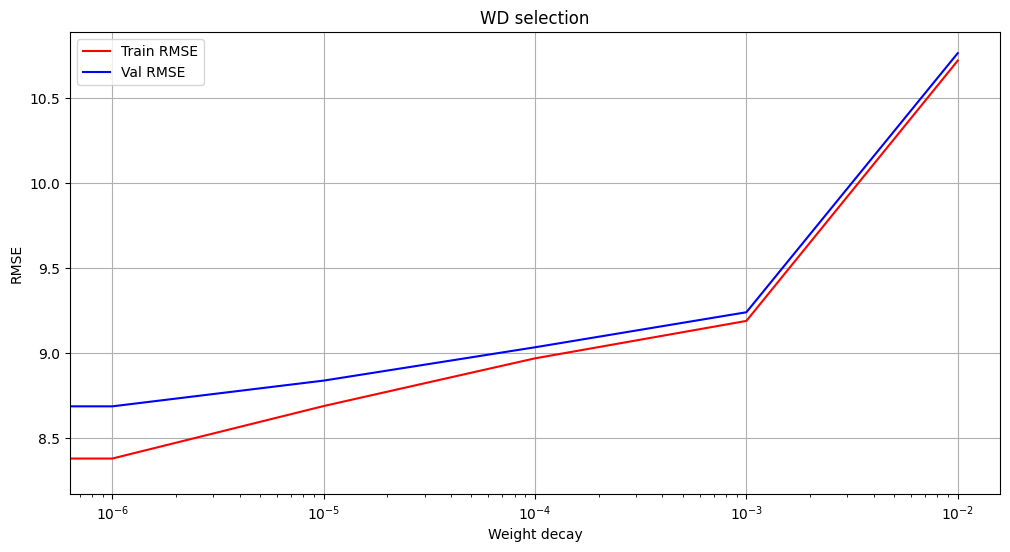

In [27]:
plt.figure(figsize = (12, 6))
plt.plot(wds, rmses_train1, label = 'Train RMSE', color='red')
plt.plot(wds, rmses_val1, label='Val RMSE', color='blue')
plt.xscale('log')
plt.xlabel('Weight decay')
plt.ylabel('RMSE')
plt.title('WD selection')
plt.legend()
plt.grid(True)
plt.show()

При wd=1е-6 и wd=0 значения RMSE на валидации одинаково (8.69), однако при wd=0  достигается минимальное значение RMSE как на валидационной выборке, так и на трейне, поэтому дальше будем использовать именно это значение

Опишите результаты экспериментов (без их описания за работу ставится ноль баллов)

__Ваше подробное описание:__ В первом эксперименте мы выбрали оптимальное значение lr (1e-3). По графику так же видно, что минимальное RMSE достигается при такой длине шага. Слишком большой или слишком маленький шаг не доходит до минимума. Дальше мы выбрали оптимальное значение wd (wd=0). При более высоких занчениях wd качество модели снижается

> Как вы могли заметить, еще одна рутина DL-инженера &mdash; утомительное ожидание обучения моделей.




**Задание 13 (6 баллов).**

Думаю направление размышлений вы поняли. Постарайтесь с помощью своих экспериментов выбить максимально возможное значение RMSE на тестовой выборке. Соотношение между полученным значением метрики на тестовой выборке и баллами за задание следующее:

- $\text{RMSE} \le 8.90 $ &mdash; 2 балла
- $\text{RMSE} \le 8.80 $ &mdash; 4 балла
- $\text{RMSE} \le 8.75 $ &mdash; 6 баллов

**Различные трюки, которые можно попробовать:**

1. Попробуйте делать во время обучения раннюю остановку обучения и сохранять модель в тот момент, когда качество на валидации начало ухудшаться, то есть модель начала переобучаться
2. Попробуйте усложнить архитектуру нейросет
    - Больше/меньше нейронов
    - Больше/меньше слоёв
    - Другие функции активации (tanh, relu, leaky relu, elu etc)
    - Регуляризация (dropout, l1,l2)
3. Попробуйте другие оптимизаторы, а также смену скорости обучения по расписанию.

И это далеко не полный список. Обратите внимание, что делать grid_search для больших сеток это довольно времязатратное занятие... Попробовать несколько значений, как мы делали в заданиях выше, адекватно, но делать какой-то огромный перебор будет самоубийством.

Логгируйте свои эксперименты. За один прогон пробуйте одно изменение. Иначе будет непонятно какие именно изменения улучшили качество, а какие ухудшили.

In [28]:
# your code here
# ༼ つ ಥ_ಥ ༽つ
g

scaler1 = StandardScaler()
X_train_sc1 = scaler1.fit_transform(X_train)
X_val_sc1 = scaler1.transform(X_val)
X_test_sc1 = scaler1.transform(X_test)

train_ds4 = SongsDSregrNorm(X_train_sc1, y_train)
val_ds4 = SongsDSregrNorm(X_val_sc1, y_val)
test_ds4 = SongsDSregrNorm(X_test_sc1, y_test)

train_loader4 = DataLoader(train_ds4, batch_size=64, shuffle=True)
val_loader4 = DataLoader(val_ds4, batch_size=64)
test_loader4 = DataLoader(test_ds4, batch_size=64)

modelfin = GUESSregrNetSIGMANewDROP(input_dim=X_train_sc.shape[1]).to(device)
optimizer_Adam = torch.optim.Adam(modelfin.parameters(), lr=1e-3, weight_decay=0)

train(modelfin, optimizer_Adam, criterion3, train_loader4, val_loader4, epochs=10)

rmse_test4 = rmseregr_norm(modelfin, test_loader4, device)
print(f'RMSE на тесте: {rmse_test4:.2f}')

train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 1/10: Train Loss = 0.0110, Val Loss = 0.0103


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 2/10: Train Loss = 0.0101, Val Loss = 0.0100


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 3/10: Train Loss = 0.0099, Val Loss = 0.0098


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 4/10: Train Loss = 0.0098, Val Loss = 0.0098


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 5/10: Train Loss = 0.0097, Val Loss = 0.0097


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 6/10: Train Loss = 0.0096, Val Loss = 0.0096


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 7/10: Train Loss = 0.0095, Val Loss = 0.0096


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 8/10: Train Loss = 0.0094, Val Loss = 0.0096


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 9/10: Train Loss = 0.0093, Val Loss = 0.0095


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 10/10: Train Loss = 0.0093, Val Loss = 0.0095
RMSE на тесте: 8.69


RMSE на тесте уже удовлетворяет требуемым условиям, однако постараемся все равно улучшить качество модели)

In [29]:
g

class GUESSregrNetSIGMANewDROP1(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.model = nn.Sequential(
          nn.Linear(input_dim, 256),
          nn.LeakyReLU(negative_slope=0.01),
          nn.Dropout(0.2),
          nn.Linear(256, 128),
          nn.LeakyReLU(negative_slope=0.01),
          nn.Dropout(0.2),
          nn.Linear(128, 1),
          nn.Sigmoid(),
        )

    def forward(self, x):
        return self.model(x)


modelfin1 = GUESSregrNetSIGMANewDROP1(input_dim=X_train_sc.shape[1]).to(device)
optimizer_Adam = torch.optim.Adam(modelfin1.parameters(), lr=1e-3, weight_decay=0)

train(modelfin1, optimizer_Adam, criterion3, train_loader4, val_loader4, epochs=10)

rmse_test5 = rmseregr_norm(modelfin1, test_loader4, device)
print(f'RMSE на тесте: {rmse_test5:.2f}')

train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 1/10: Train Loss = 0.0111, Val Loss = 0.0102


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 2/10: Train Loss = 0.0101, Val Loss = 0.0100


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 3/10: Train Loss = 0.0099, Val Loss = 0.0099


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 4/10: Train Loss = 0.0098, Val Loss = 0.0098


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 5/10: Train Loss = 0.0097, Val Loss = 0.0097


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 6/10: Train Loss = 0.0096, Val Loss = 0.0097


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 7/10: Train Loss = 0.0095, Val Loss = 0.0097


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 8/10: Train Loss = 0.0095, Val Loss = 0.0096


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 9/10: Train Loss = 0.0094, Val Loss = 0.0098


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 10/10: Train Loss = 0.0093, Val Loss = 0.0095
RMSE на тесте: 8.68


Заменили функцию активации на LeakyReLU, которая учитывает отрицательные значения. Качество на трейне немного улучшилось (ура, победа), однако появилось переобучение: лосс на валидации сначался уменьшился, потом вырос (правда, потом опять уменьшился). Попробуем добавить регуляризацию через weight decay

In [37]:
g

class GUESSregrNetSIGMANewDROP1(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.model = nn.Sequential(
          nn.Linear(input_dim, 256),
          nn.LeakyReLU(negative_slope=0.01),
          nn.Dropout(0.2),
          nn.Linear(256, 128),
          nn.LeakyReLU(negative_slope=0.01),
          nn.Dropout(0.2),
          nn.Linear(128, 1),
          nn.Sigmoid(),
        )

    def forward(self, x):
        return self.model(x)


modelfin1 = GUESSregrNetSIGMANewDROP1(input_dim=X_train_sc.shape[1]).to(device)
optimizer_Adam = torch.optim.Adam(modelfin1.parameters(), lr=1e-3, weight_decay=1e-6)

train(modelfin1, optimizer_Adam, criterion3, train_loader4, val_loader4, epochs=10)

rmse_test5 = rmseregr_norm(modelfin1, test_loader4, device)
print(f'RMSE на тесте: {rmse_test5:.2f}')

train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 1/10: Train Loss = 0.0110, Val Loss = 0.0103


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 2/10: Train Loss = 0.0101, Val Loss = 0.0100


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 3/10: Train Loss = 0.0099, Val Loss = 0.0100


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 4/10: Train Loss = 0.0098, Val Loss = 0.0098


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 5/10: Train Loss = 0.0097, Val Loss = 0.0097


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 6/10: Train Loss = 0.0097, Val Loss = 0.0098


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 7/10: Train Loss = 0.0096, Val Loss = 0.0098


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 8/10: Train Loss = 0.0095, Val Loss = 0.0097


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 9/10: Train Loss = 0.0095, Val Loss = 0.0096


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 10/10: Train Loss = 0.0094, Val Loss = 0.0096
RMSE на тесте: 8.71


Добавление weight decay ухудшило качество модели. Оставим wd, но поменяем немного оптимизатор

In [35]:
g

class GUESSregrNetSIGMANewDROP1(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.model = nn.Sequential(
          nn.Linear(input_dim, 256),
          nn.LeakyReLU(negative_slope=0.01),
          nn.Dropout(0.2),
          nn.Linear(256, 128),
          nn.LeakyReLU(negative_slope=0.01),
          nn.Dropout(0.2),
          nn.Linear(128, 1),
          nn.Sigmoid(),
        )

    def forward(self, x):
        return self.model(x)


modelfin1 = GUESSregrNetSIGMANewDROP1(input_dim=X_train_sc.shape[1]).to(device)
optimizer_Adam = torch.optim.AdamW(modelfin1.parameters(), lr=1e-3, weight_decay=1e-6)

train(modelfin1, optimizer_Adam, criterion3, train_loader4, val_loader4, epochs=10)

rmse_test5 = rmseregr_norm(modelfin1, test_loader4, device)
print(f'RMSE на тесте: {rmse_test5:.2f}')

train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 1/10: Train Loss = 0.0110, Val Loss = 0.0102


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 2/10: Train Loss = 0.0101, Val Loss = 0.0101


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 3/10: Train Loss = 0.0099, Val Loss = 0.0099


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 4/10: Train Loss = 0.0098, Val Loss = 0.0098


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 5/10: Train Loss = 0.0097, Val Loss = 0.0097


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 6/10: Train Loss = 0.0096, Val Loss = 0.0096


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 7/10: Train Loss = 0.0095, Val Loss = 0.0097


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 8/10: Train Loss = 0.0095, Val Loss = 0.0096


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 9/10: Train Loss = 0.0094, Val Loss = 0.0096


train:   0%|          | 0/4530 [00:00<?, ?it/s]

val:   0%|          | 0/1510 [00:00<?, ?it/s]

Epoch 10/10: Train Loss = 0.0093, Val Loss = 0.0095
RMSE на тесте: 8.68


Ура-ура! Переобучения нет и качество на тесте теперь 8.68

Опишите результаты экспериментов (без их описания за работу ставится ноль баллов)

__Ваше подробное описание:__ Сначала мы заменили функциу активации на LeakyReLU, это позволило лучше учитывать отрицательные значения, и в результате снизился RMSE на тесте. Но в то же время появилось переобучение. Добавление weight decay увеличивало RMSE, поэтому немного поменяли и оптимизатор. В итоге AdamW совместно с LeakyReLU и weight decay помогли снизить переоблучение и добиться желаемого качество на тесте без переобучения

## Бонус (0.1 балла)

Прикрепите фотографию того, как вы начали этот сентябрь. Какую самую классную эмоцию вы испытали за прошедший месяц?

__место для картики и эмоции__


эх в сентябре и трава была зеленее!! самая классная эмоция - это радость от встреч с друзьями и от спонтанной поездки в питер :)

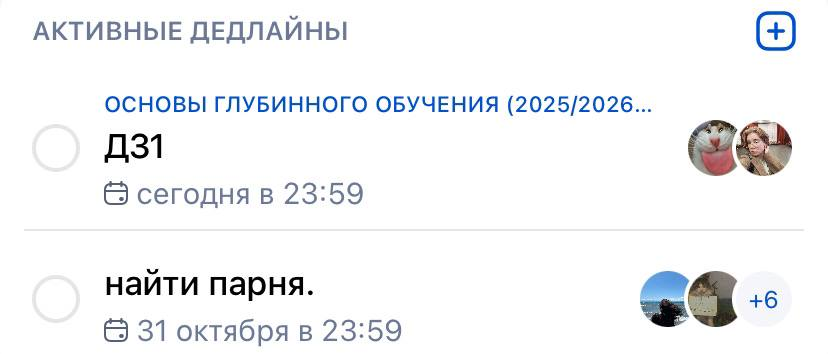

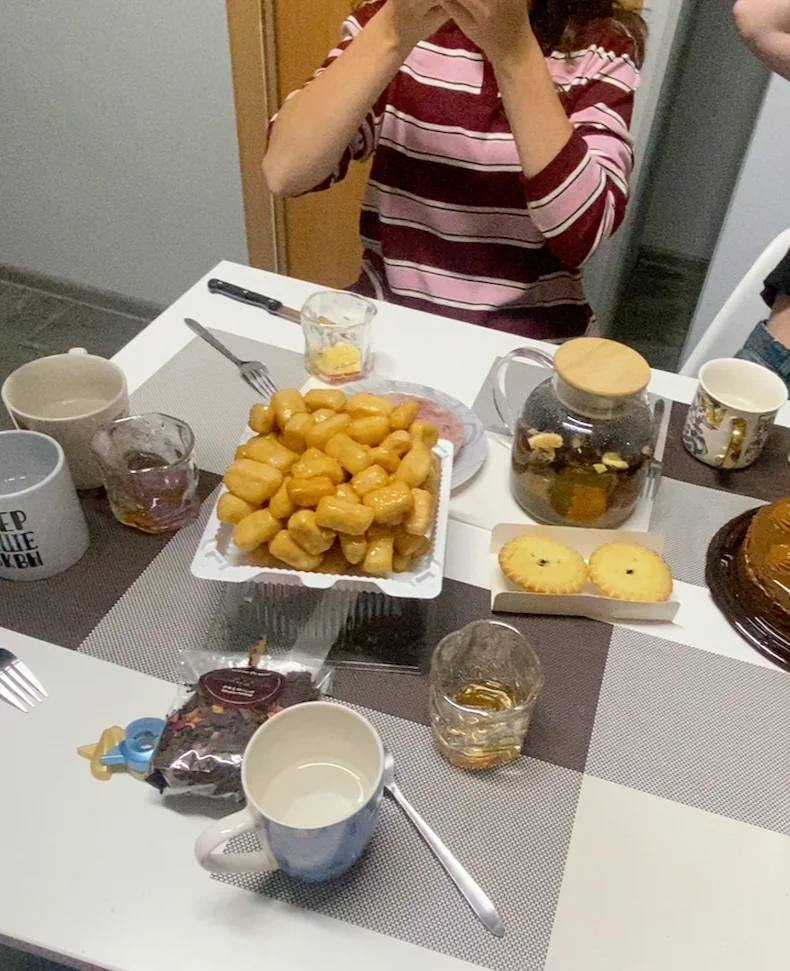